<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/NLP_password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/content/drive/MyDrive/dane/password/password.csv",on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data.shape

(669640, 2)

In [5]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

password    0
strength    0
dtype: int64

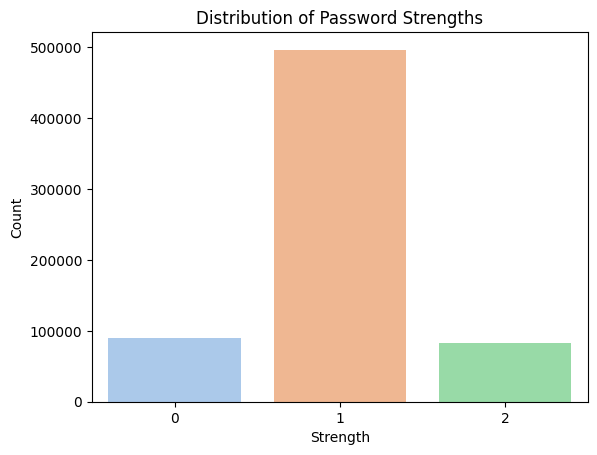

In [7]:
sns.countplot(x='strength', data=data, palette = 'pastel')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Distribution of Password Strengths')
plt.show()

In [8]:
x = np.array(data["password"])
y = np.array(data["strength"])

In [9]:
def word(password):
  character=[]
  for i in password:
    character.append(i)
  return character

In [10]:
# użycie wektoryzatora TF-IDF do konwersji danych łańcuchowych na dane numeryczne
tdif = TfidfVectorizer(tokenizer=word)
X = tdif.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(535711, 153)

In [26]:
print(X_train[10])

  (0, 34)	0.23687287253815986
  (0, 43)	0.253148774865457
  (0, 42)	0.5336522458620413
  (0, 40)	0.2747893458310234
  (0, 75)	0.24765963120988504
  (0, 57)	0.2931079703037465
  (0, 56)	0.3501595639664473
  (0, 35)	0.3628041049050246
  (0, 38)	0.2596169041038203
  (0, 69)	0.22500218907298938


In [27]:
print(x[10])

asv5o9yu


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
usrpwd = input("Podaj hasło: ")
data = tdif.transform([usrpwd]).toarray()
pwd_strength = model.predict(data)

In [ ]:
pwd_strength[0]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak','Medium', 'Strong'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
4